### Assignment 3 - Juan Esteban Rincón Poveda

Using Pandas and Statsmodels write a Jupyter Notebook that: 

1. Uses the data from the Maddison Project to plot the evolution of total population across the world. 
2. Plots the evolution of the share of the world population by countries and WB regions.
3. Downloads fertility, mortality and life expectancy data from the WB and plots its evolution in the last 60 years.
4. Downloads mortality and life expectancy data (across regions and cohorts) from the [Human Mortality Database](https://www.mortality.org/) and plots its evolution.
5. Using this data analyze the convergence of life expectanty, mortality and fertility.

Submit your notebook as a ``pull request`` to the course's github repository.

### 1. Uses the data from the Maddison Project to plot the evolution of total population across the world.

In [285]:
import pandas as pd
import numpy as np
import os


pathout = './data/'
if not os.path.exists(pathout):
    os.mkdir(pathout)
pathgraphs = './graphs/'
if not os.path.exists(pathgraphs):
    os.mkdir(pathgraphs)
    
    
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()

In [286]:
try:
    maddison_new = pd.read_stata(pathout + 'Maddison2018.dta')
    maddison_new_region = pd.read_stata(pathout + 'Maddison2018_region.dta')
    maddison_new_1990 = pd.read_stata(pathout + 'Maddison2018_1990.dta')
except:
    maddison_new = pd.read_stata('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018.dta')
    maddison_new.to_stata(pathout + 'Maddison2018.dta', write_index=False, version=117)
    maddison_new_region = pd.read_stata('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018_region_data.dta')
    maddison_new_region.to_stata(pathout + 'Maddison2018_region.dta', write_index=False, version=117)
    maddison_new_1990 = pd.read_stata('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018_1990bm.dta')
    maddison_new_1990.to_stata(pathout + 'Maddison2018_1990.dta', write_index=False, version=117)

In [287]:
pop = maddison_new_region
pop['year'] = pop.year.astype(int)
pop['population'] = pop['pop']

In [288]:
pop['year'] = pop.year.astype(int)

In [289]:
popg = pop
popg = popg.pivot_table(index='year',columns='region_name',values='population')


In [290]:
fig, ax = plt.subplots(figsize=(10,8),dpi=200)
sns.lineplot(data=popg , alpha=1, style='region', dashes=False, markers=True)
ax.set_xlabel('Year')
ax.set_ylabel('Population')
ax.set_title("Evolution of total population across the world", fontsize=18)

Text(0.5, 1.0, 'Evolution of total population across the world')

### 2. Plots the evolution of the share of the world population by countries and WB regions.

In [291]:
import requests
import pandas as pd
import pandas_datareader as web


session = requests.Session()
session.verify = False

In [292]:
import ssl 

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

In [293]:
import pandas as pd
import world_bank_data as wb
pd.set_option('display.max_rows', 6)
import ssl 

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
    import urllib3,certifi
https = urllib3.PoolManager( cert_reqs='CERT_REQUIRED',
 ca_certs=certifi.where(),)  

from time import sleep
from pandas_datareader import data, wb
import wbpy 
from pprint import pprint

In [294]:
import world_bank_data as wb
pd.set_option('display.max_rows', 6)

In [295]:
wbcountries = wb.get_countries()
wbcountries['name'] = wbcountries.name.str.strip()

In [296]:
wbcountries.reset_index(level=0, inplace=True)

In [297]:
wbcountries.rename(columns={'id':'countrycode'}, inplace=True)


In [298]:
##### Maddison

In [299]:
popcountry=maddison_new.merge(popworld, on='year')

In [300]:
popcountry['share']=(popcountry['pop']/popcountry['World'])*100

In [301]:
popcountry2 = popcountry.pivot_table(index='year',columns='country',values='share',aggfunc='sum')

In [302]:
popregion = popcountry[['countrycode', 'country', 'year', 'pop',
                        'World']].merge(wbcountries[['countrycode', 'region']], on=['countrycode'])

In [303]:
popregion['share']=(popregion['pop']/popregion['World'])*100

In [304]:
popregion2 = popregion.pivot_table(index='year',columns='region',values='share',aggfunc='sum')

Text(0.5, 1.0, 'Share of world population by region')

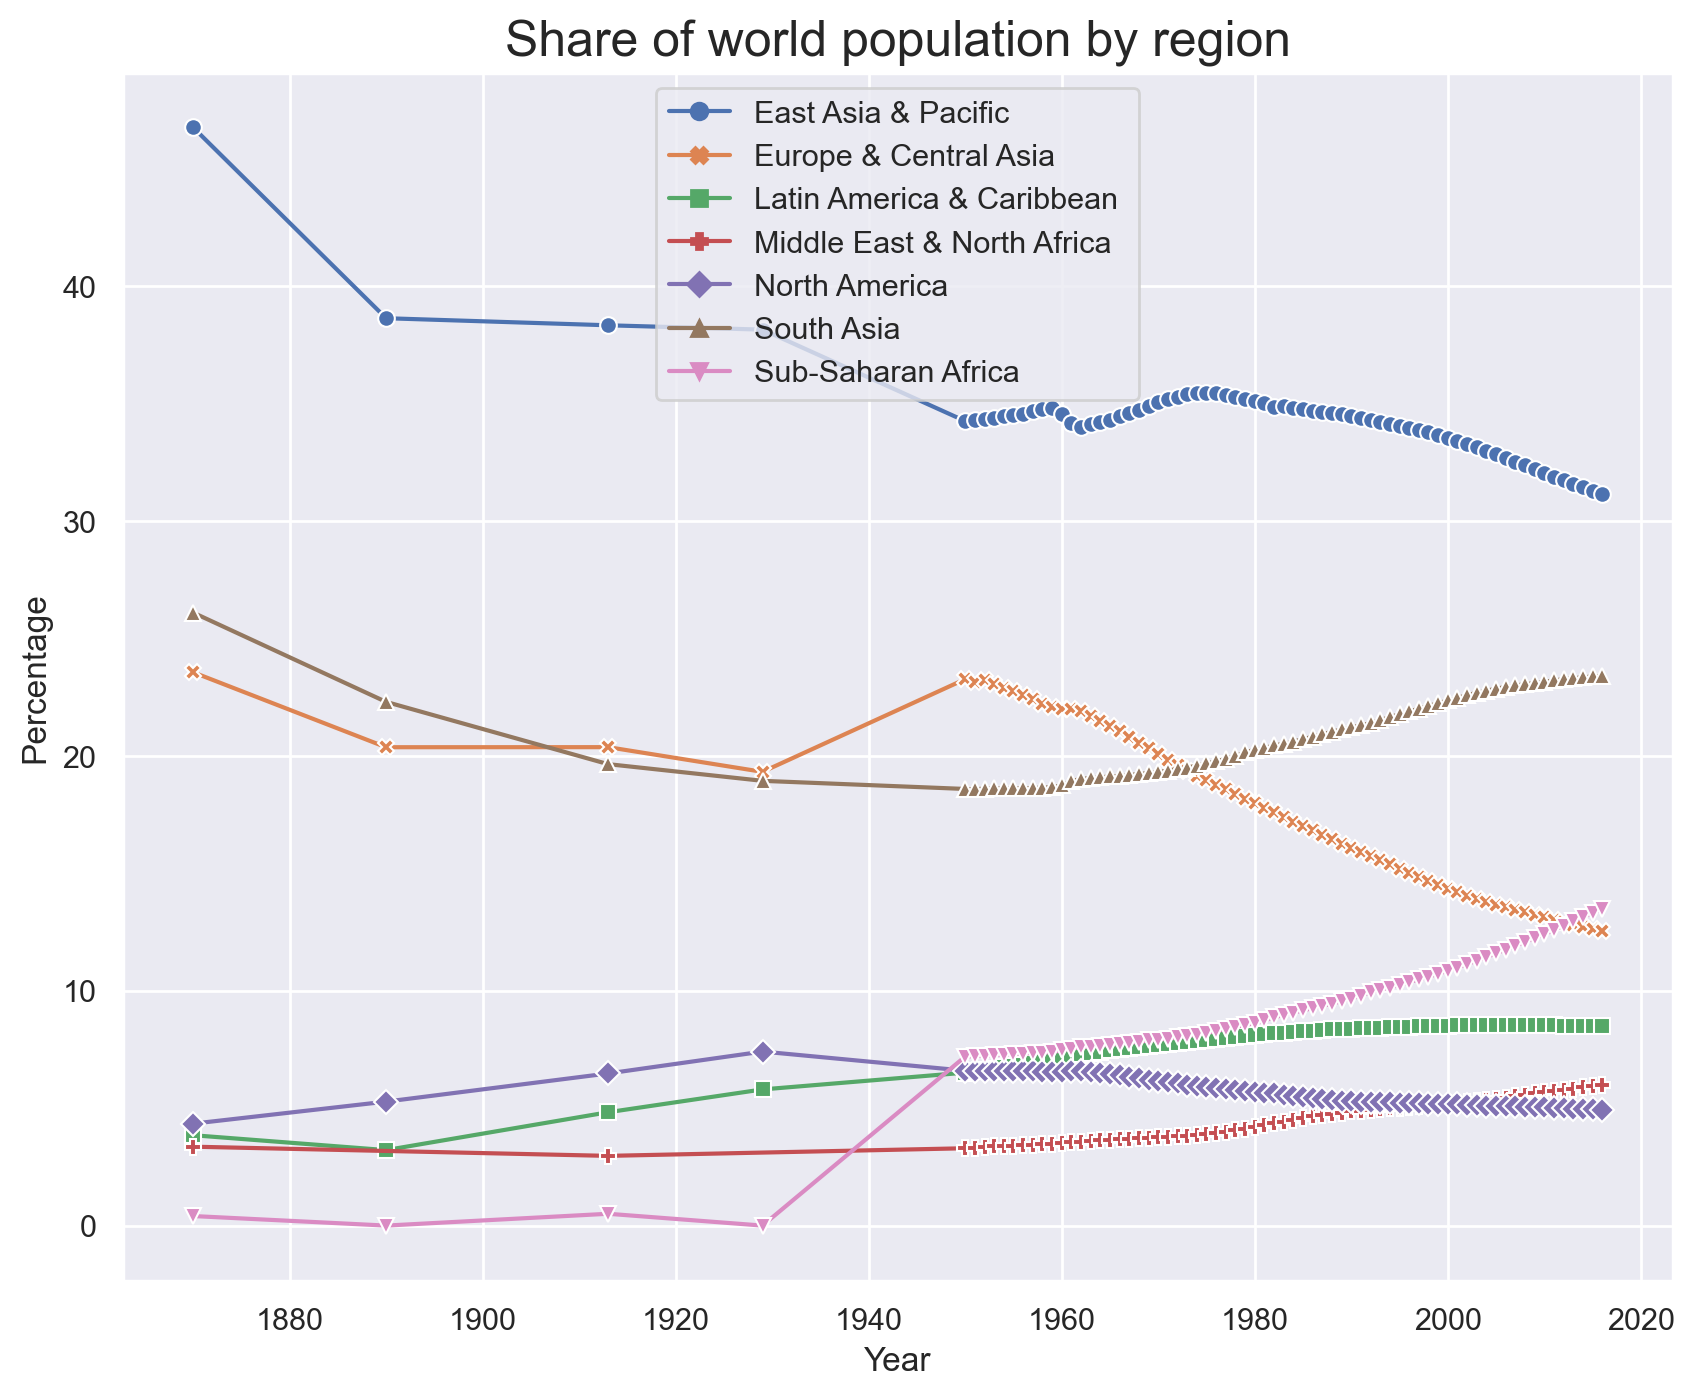

In [305]:
fig, ax = plt.subplots(figsize=(10,8),dpi=200)
sns.lineplot(data=popregion2 , alpha=1, style='country', dashes=False, markers=True)
ax.set_xlabel('Year')
ax.set_ylabel('Percentage')
ax.set_title("Share of world population by region", fontsize=18)

### 3. Downloads fertility, mortality and life expectancy data from the WB and plots its evolution in the last 60 years.

In [306]:
fertility = 'SP.DYN.TFRT.IN'
mortality = 'SP.DYN.CDRT.IN'
lifeexp = 'SP.DYN.LE00.IN'

In [307]:
world2= wb.get_series('SP.DYN.CDRT.IN',id_or_value='id', simplify_index=True)
world2 = world2.to_frame()
world2=world2.reset_index()
world2 = world2.drop(['Year','Country'],axis=1)


In [308]:
world1= wb.get_series('SP.DYN.TFRT.IN',id_or_value='id', simplify_index=True)

world1 = world1.to_frame()
world1=world1.reset_index()

In [309]:
world3= wb.get_series('SP.DYN.LE00.IN',id_or_value='id', simplify_index=True)
world3 = world3.to_frame()
world3=world3.reset_index()
world3 = world3.drop(['Year','Country'],axis=1)


In [310]:
world1['SP.DYN.LE00.IN'] = world3
world1['SP.DYN.CDRT.IN'] = world2

In [311]:
world1['Year']=pd.to_numeric(world1.Year)
world1 = world1

In [312]:
world1.rename(columns={'SP.DYN.TFRT.IN':'fertility'}, inplace=True)
world1.rename(columns={'SP.DYN.CDRT.IN':'mortality'}, inplace=True)
world1.rename(columns={'SP.DYN.LE00.IN':'lifeex'}, inplace=True)

In [313]:
worldP = world1.loc[world1.Country=='WLD']
worldA = worldP.loc[worldP.Year!=2019]

In [314]:
worldA = worldA.pivot_table(index='Year',columns='Country',aggfunc='sum')

In [315]:
worldA.rename(columns={'SP.DYN.TFRT.IN':'fertility'}, inplace=True)
worldA.rename(columns={'SP.DYN.CDRT.IN':'mortality'}, inplace=True)
worldA.rename(columns={'SP.DYN.LE00.IN':'lifeex'}, inplace=True)
worldA

fertility     lifeex  mortality
Country       WLD        WLD        WLD
Year                                   
1960     4.980164  52.578207  17.714523
1961     5.002610  53.079382  14.999311
1962     5.024376  53.496641  13.952690
...           ...        ...        ...
2016     2.445576  72.180484   7.544202
2017     2.428196  72.385296   7.540865
2018     2.415032  72.560056   7.528492

[59 rows x 3 columns]

Text(0.5, 1.0, 'Fertility, Mortality and Life expectancy')

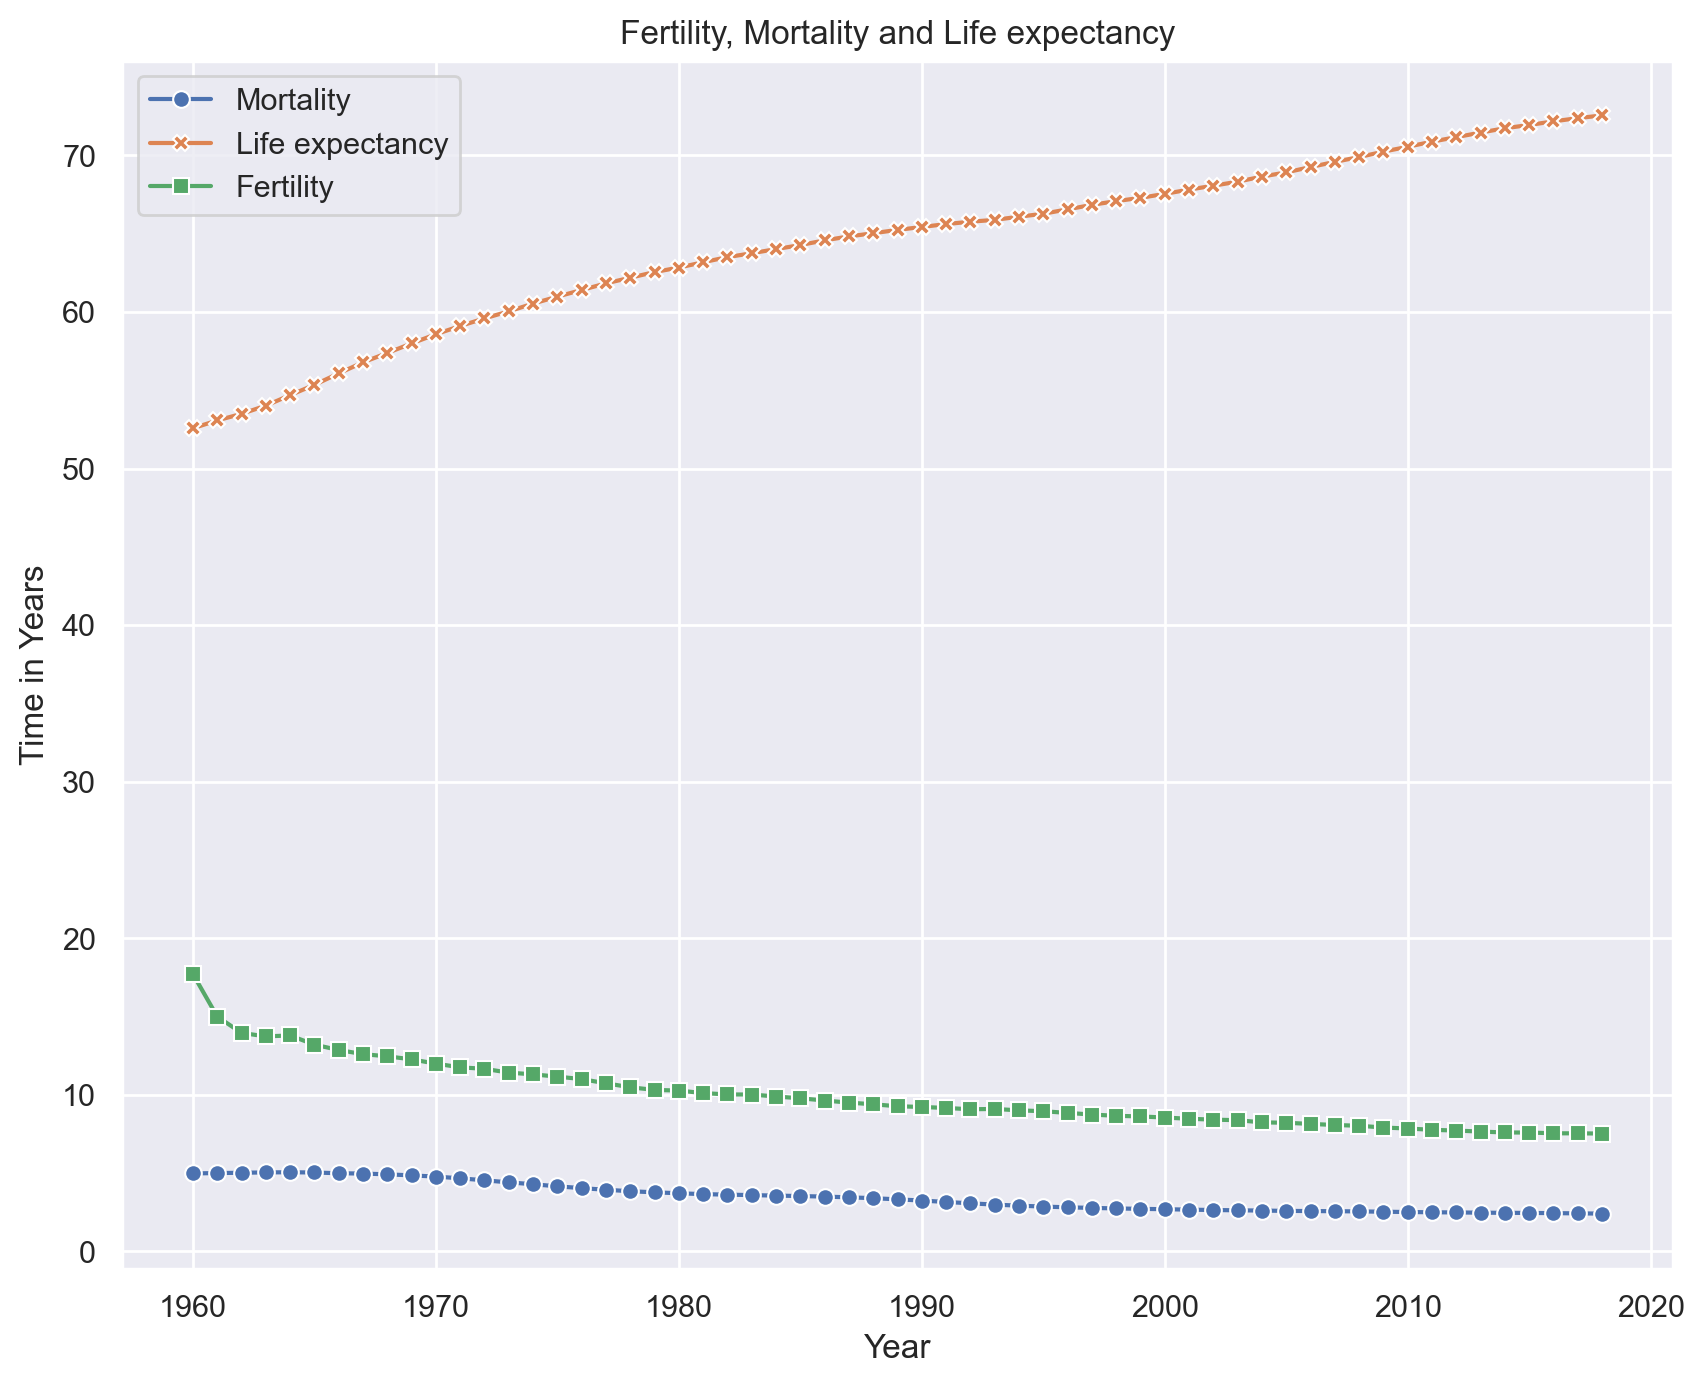

In [316]:
fig, ax = plt.subplots(figsize=(10,8),dpi=200)
sns.lineplot(data=worldA , alpha=1, style='country', dashes=False, markers=True)
ax.tick_params(axis = 'both', which = 'major')
ax.tick_params(axis = 'both', which = 'minor')
plt.legend(['Mortality','Life expectancy','Fertility'])
ax.set_xlabel('Year')
ax.set_ylabel('Time in Years')
ax.set_title("Fertility, Mortality and Life expectancy")


### 4. Downloads mortality and life expectancy data (across regions and cohorts) from the [Human Mortality Database] and plot

In [243]:
mortality = pd.read_csv(pathout + 'stmf.csv')
mortality

/Users/juanestebanrincon/opt/anaconda3/envs/GeoPython38env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


#HMD STMF pooled file. Last modified: 2020-06-17 22:35:14 
CountryCode Year Week Sex D0_14              D15_64           D65_74             D75_84            D85p             DTotal           R0_14                  R15_64              R65_74              R75_84             R85p               RTotal               Split SplitSex                                           Forecast        
AUT         2000 1    m   7                  183              212                249               163              814              0.000520377479835266   0.00351264205553729 0.0376068457268229  0.0951375307440371 0.231834312697249  0.0109251576286067   0     0                                                         0        
                      f   2                  104              141                338               468              1053             0.000156223010902756   0.00200229785525484 0.0195527451995018  0.0614422751712247 0.224357017520144  0.0132384791578365   0     0                                                         0        
...                                                                                                                                                                                                                                                                                                                          ...        
USA         2020 22   m   151.77076943127898 5765.40937971134 4471.04191585272   5020.51691998012  4990.468229379   22332.2503726363 0.000258153774132254   0.00282672437660941 0.0152866622332658  0.0360921462979277 0.106987419548058  0.007190627382288409 1     1                                                         1        
                      f   116.360020669425   3474.45983018796 3300.2159901441996 4617.61902890563  7546.1379157383  17121.7496273637 0.000206806961681697   0.00170080852101802 0.00987476945238517 0.0260094873212003 0.0912964013963433 0.00535075252011226  1     1                                                         1        
                      b   268.130790100704   9239.8692098993  7771.25790599692   9638.135948885749 12536.6061451173 39454.0          0.00023304397099590298 0.00226332235995523 0.0124005446461531  0.0304389067548227 0.0969569520284572 0.00625695679270201  1     0                                                         1        

[54151 rows x 1 columns]

In [260]:
mortality = mortality.reset_index()
new_header = mortality.iloc[0] 
mortality.columns = new_header 

mortality

0          0      0      0  CountryCode  Year  Week  Sex    D0_14   D15_64  \
0          0      0      0  CountryCode  Year  Week  Sex    D0_14   D15_64   
1          1      1      1          AUT  2000     1    m        7      183   
2          2      2      2          AUT  2000     1    f        2      104   
...      ...    ...    ...          ...   ...   ...  ...      ...      ...   
54148  54148  54148  54148          USA  2020    22    m  151.771  5765.41   
54149  54149  54149  54149          USA  2020    22    f   116.36  3474.46   
54150  54150  54150  54150          USA  2020    22    b  268.131  9239.87   

0       D65_74  ...   DTotal                 R0_14               R15_64  \
0       D65_74  ...   DTotal                 R0_14               R15_64   
1          212  ...      814  0.000520377479835266  0.00351264205553729   
2          141  ...     1053  0.000156223010902756  0.00200229785525484   
...        ...  ...      ...                   ...                  ...   
54148  4471.04  ...  22332.3           0.000258154           0.00282672   
54149  3300.22  ...  17121.7           0.000206807           0.00170081   
54150  7771.26  ...    39454           0.000233044           0.00226332   

0                  R65_74              R75_84               R85p  \
0                  R65_74              R75_84               R85p   
1      0.0376068457268229  0.0951375307440371  0.231834312697249   
2      0.0195527451995018  0.0614422751712247  0.224357017520144   
...                   ...                 ...                ...   
54148           0.0152867           0.0360921           0.106987   
54149          0.00987477           0.0260095          0.0912964   
54150           0.0124005           0.0304389           0.096957   

0                  RTotal  Split  SplitSex  Forecast  
0                  RTotal  Split  SplitSex  Forecast  
1      0.0109251576286067      0         0         0  
2      0.0132384791578365      0         0         0  
...                   ...    ...       ...       ...  
54148          0.00719063      1         1         1  
54149          0.00535075      1         1         1  
54150          0.00625696      1         0         1  

[54151 rows x 22 columns]

In [245]:
mortalityb=mortality.loc[mortality.Sex=='b']
mortalitym=mortality.loc[mortality.Sex=='m']
mortalityf=mortality.loc[mortality.Sex=='f']

In [246]:
graphb = mortalityb[['Year','RTotal']]
graphb = graphb.apply(pd.to_numeric)

graphm = mortalitym[['Year','RTotal']]
graphm = graphm.apply(pd.to_numeric)

graphf = mortalityf[['Year','RTotal']]
graphf = graphf.apply(pd.to_numeric)


In [247]:
meanb =graphb.groupby(['Year']).mean()
meanf =graphf.groupby(['Year']).mean()
meanm =graphm.groupby(['Year']).mean()

In [248]:
meanb.rename(columns={'RTotal':'Both'}, inplace=True)
meanf.rename(columns={'RTotal':'Female'}, inplace=True)
meanm.rename(columns={'RTotal':'Male'}, inplace=True)


In [251]:
TOT=meanb.merge(meanm, on='Year')
TOT=TOT.merge(meanf, on = 'Year')

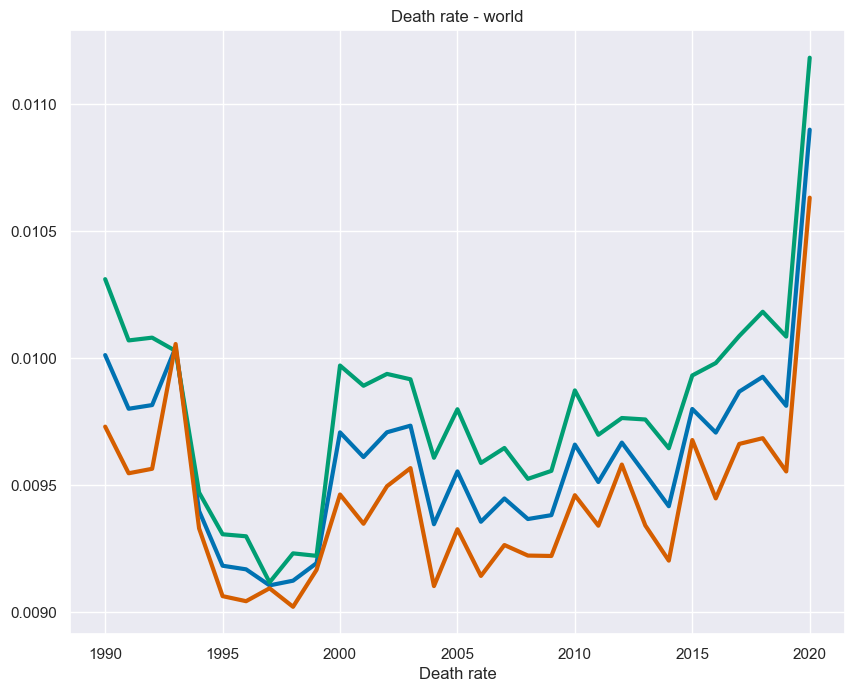

In [256]:
fig, ax = plt.subplots(figsize=(10,8),dpi=100)
plt.style.use('seaborn-colorblind')
plt.plot(TOT, linewidth=3)

plt.title('Death rate - world')
plt.xlabel('Year')
plt.xlabel('Death rate')



plt.show()

In [268]:
mortality.rename(columns={'CountryCode':'countrycode'}, inplace=True)

In [269]:
mortalitycohort = mortality[['countrycode', 'Year','Sex', 'R0_14', 'R15_64', 'R65_74', 'R75_84'
                             , 'R85p']].merge(wbcountries[['countrycode', 'region']], on=['countrycode'])

In [270]:
mortalitycohort2 = mortalitycohort.loc[mortalitycohort.Sex=='b']

In [271]:
### USA

In [272]:
mortaily_region1= mortalitycohort2.loc[mortalitycohort2.region=='North America']
mortaily_region1 =mortaily_region1.drop(columns=['countrycode','region','Sex']) 
mortaily_region1

Year        R0_14      R15_64     R65_74     R75_84      R85p
44321  2013   0.00053924  0.00342611  0.0221515  0.0569101  0.170108
44324  2013  0.000546782  0.00344543  0.0227791  0.0585223  0.174927
44327  2013   0.00052114  0.00333941  0.0222013   0.057038   0.17049
...     ...          ...         ...        ...        ...       ...
45470  2020  0.000381345  0.00333091   0.017655  0.0433368   0.13804
45473  2020   0.00033519  0.00298188  0.0155477   0.038164  0.121564
45476  2020  0.000233044  0.00226332  0.0124005  0.0304389  0.096957

[386 rows x 6 columns]

In [273]:
mortaily_region1 = mortaily_region1.pivot_table(index='Year', aggfunc='sum')

Text(0.5, 1.0, 'Mortality rate - North America')

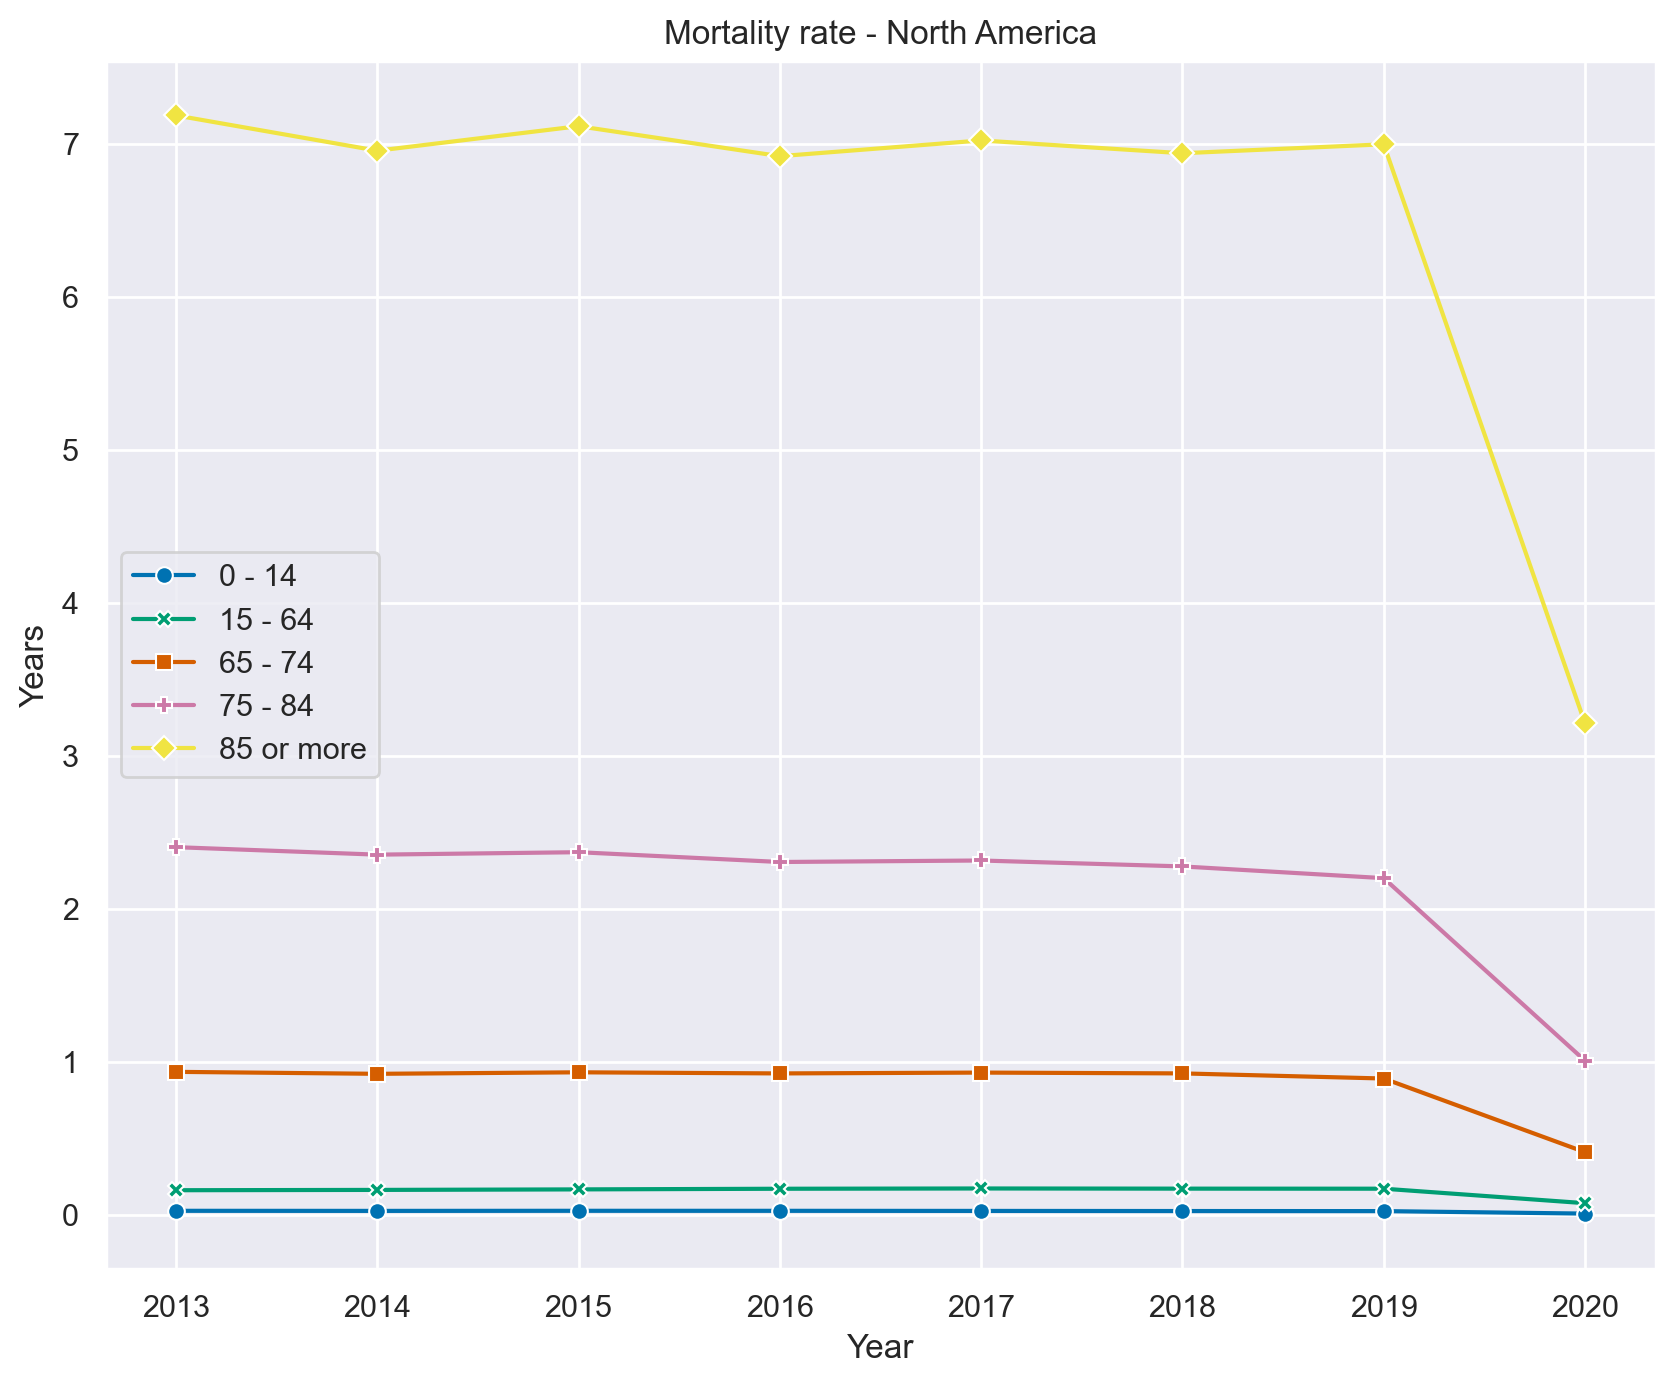

In [274]:
fig, ax = plt.subplots(figsize=(10,8),dpi=200)
sns.lineplot(data=mortaily_region1 , alpha=1, style='country', dashes=False, markers=True)
ax.tick_params(axis = 'both', which = 'major')
ax.tick_params(axis = 'both', which = 'minor')
plt.legend(['0 - 14','15 - 64','65 - 74','75 - 84', '85 or more'])
ax.set_xlabel('Year')
ax.set_ylabel('Years')
ax.set_title("Mortality rate - North America")

In [280]:
mortaily_easia = mortalitycohort2.loc[mortalitycohort2.region=='Europe & Central Asia']
mortaily_easia =mortaily_easia.drop(columns=['countrycode','region','Sex']) 
mortaily_easia = mortaily_easia.apply(pd.to_numeric)


In [281]:
mortaily_easia = mortaily_easia.pivot_table(index='Year', aggfunc='sum')

Text(0.5, 1.0, 'Mortality rate - Europe and Asia')

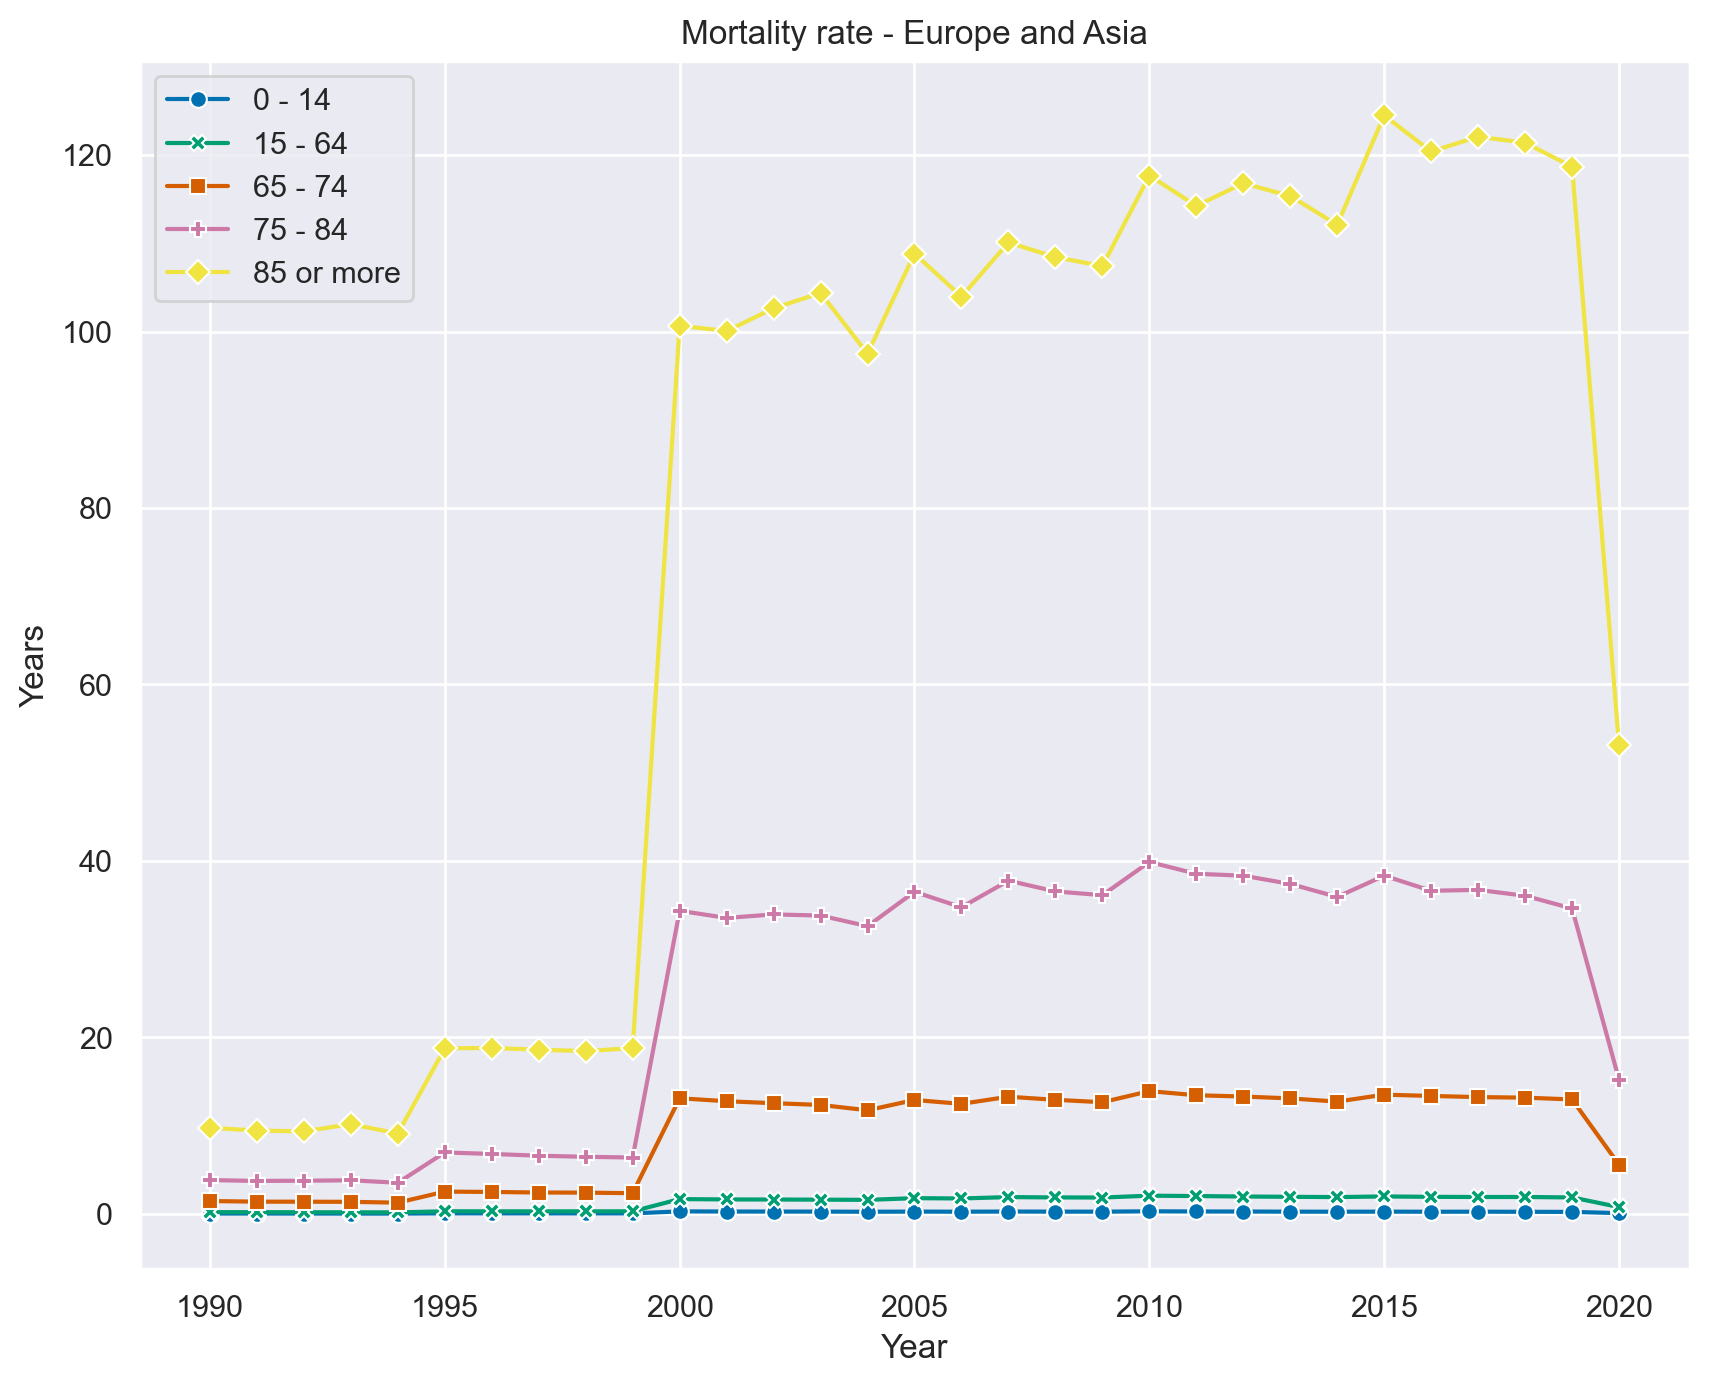

In [282]:
fig, ax = plt.subplots(figsize=(10,8),dpi=200)
sns.lineplot(data=mortaily_easia , alpha=1, style='country', dashes=False, markers=True)
ax.tick_params(axis = 'both', which = 'major')
ax.tick_params(axis = 'both', which = 'minor')
plt.legend(['0 - 14','15 - 64','65 - 74','75 - 84', '85 or more'])
ax.set_xlabel('Year')
ax.set_ylabel('Years')
ax.set_title("Mortality rate - Europe and Asia")

### 5. Using this data analyze the convergence of life expectanty, mortality and fertility.

In [317]:
worldp = world1
worldp.rename(columns={'SP.DYN.TFRT.IN':'fertility'}, inplace=True)
worldp.rename(columns={'SP.DYN.CDRT.IN':'mortality'}, inplace=True)
worldp.rename(columns={'SP.DYN.LE00.IN':'lifeex'}, inplace=True)

In [331]:
meanW =worldp.groupby(['Year']).mean()
MEAN = meanW

In [332]:
MEAN.reset_index(level=0, inplace=True)
MEAN

Year  fertility     lifeex  mortality
0   1960   5.502935  53.384637  16.372385
1   1961   5.486964  53.936576  15.811321
2   1962   5.488079  54.327360  15.446366
..   ...        ...        ...        ...
57  2017   2.694446  72.321064   7.635152
58  2018   2.663633  72.505489   7.604203
59  2019        NaN        NaN        NaN

[60 rows x 4 columns]

In [333]:
mean1960 = meanW.drop(meanW[meanW.Year != 1960].index)

In [334]:
mean1960.set_index('Year', inplace=True)
mean1960

fertility     lifeex  mortality
Year                                 
1960   5.502935  53.384637  16.372385

Text(0.5, 1.0, 'Fertility, Mortality and Life expectative - 1960')

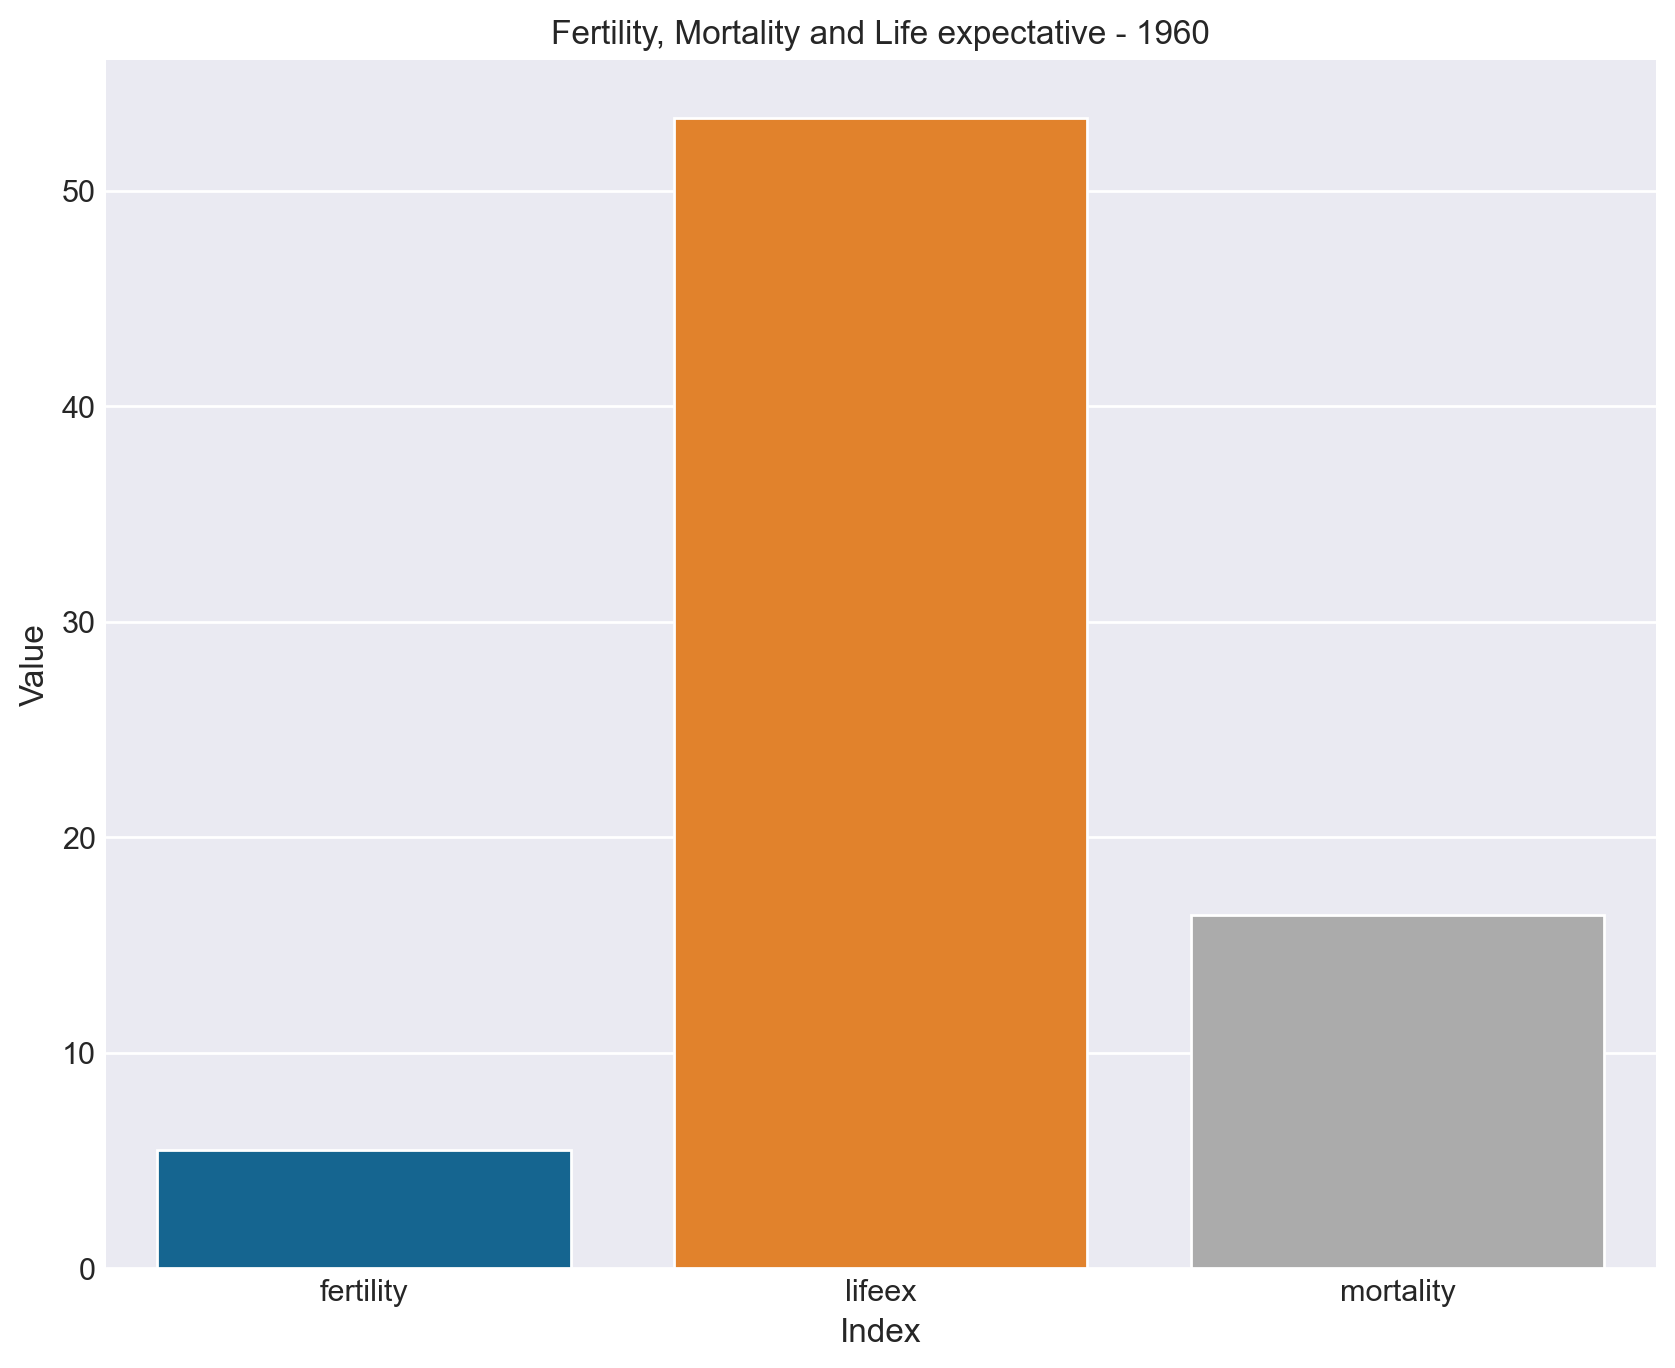

In [374]:
fig, ax = plt.subplots(figsize=(10,8),dpi=200)
sns.barplot(data=mean1960 , alpha=1)
plt.style.use('tableau-colorblind10')
ax.tick_params(axis = 'both', which = 'major')
ax.tick_params(axis = 'both', which = 'minor')
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.set_title("Fertility, Mortality and Life expectative - 1960")

In [346]:
mean1970 = meanW.drop(meanW[meanW.Year != 1970].index)
mean1980 = meanW.drop(meanW[meanW.Year != 1980].index)
mean1990 = meanW.drop(meanW[meanW.Year != 1990].index)
mean2000 = meanW.drop(meanW[meanW.Year != 2000].index)
mean2010 = meanW.drop(meanW[meanW.Year != 2010].index)
mean2018 = meanW.drop(meanW[meanW.Year != 2018].index)

In [347]:
mean1970.set_index('Year', inplace=True)
mean1980.set_index('Year', inplace=True)
mean1990.set_index('Year', inplace=True)
mean2000.set_index('Year', inplace=True)
mean2010.set_index('Year', inplace=True)
mean2018.set_index('Year', inplace=True)

Text(0.5, 1.0, 'Fertility, Mortality and Life expectative - 1990')

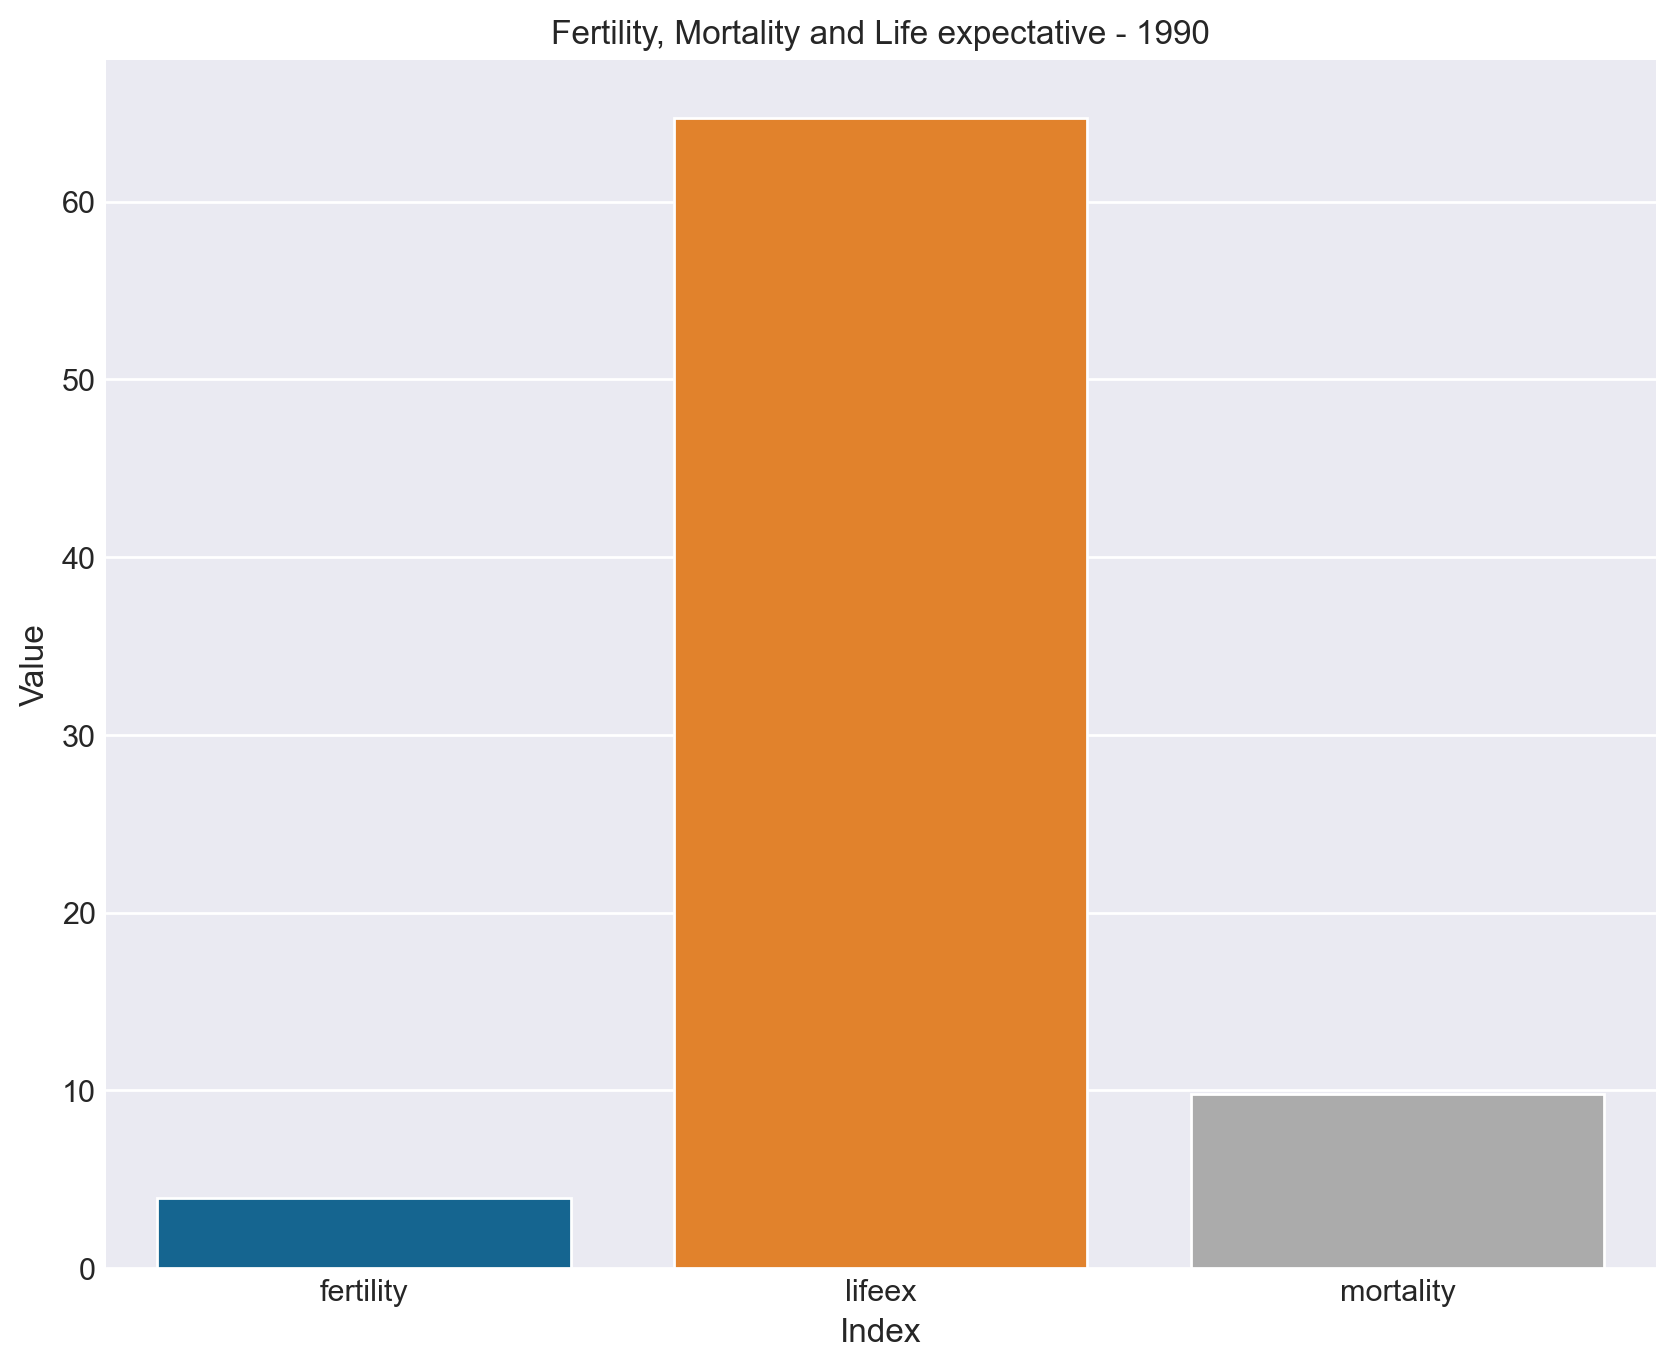

In [372]:
fig, ax = plt.subplots(figsize=(10,8),dpi=200)
sns.barplot(data=mean1990 , alpha=1)
plt.style.use('tableau-colorblind10')
ax.tick_params(axis = 'both', which = 'major')
ax.tick_params(axis = 'both', which = 'minor')
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.set_title("Fertility, Mortality and Life expectative - 1990")

In [373]:
fig, ax = plt.subplots(figsize=(10,8),dpi=200)
sns.barplot(data=mean2018 , alpha=1)
plt.style.use('tableau-colorblind10')

ax.tick_params(axis = 'both', which = 'major')
ax.tick_params(axis = 'both', which = 'minor')
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.set_title("Fertility, Mortality and Life expectative - 2018")

Text(0.5, 1.0, 'Fertility, Mortality and Life expectative - 2018')

As we can see in the mean of all countries, fertility and mortaly have decreased since 1960 and converged, but the life expectancy has increased.
We can saw this also in the next graph

In [ ]:
mean1970.set_index('Year', inplace=True)
mean1980.set_index('Year', inplace=True)
mean1990.set_index('Year', inplace=True)
mean2000.set_index('Year', inplace=True)
mean2010.set_index('Year', inplace=True)
mean2018.set_index('Year', inplace=True)

In [355]:
frames = [mean1960,mean1970,mean1980,mean1990,mean2000,mean2010,mean2018]

result = pd.concat(frames)
result

fertility     lifeex  mortality
Year                                 
1960   5.502935  53.384637  16.372385
1970   5.150248  57.802526  13.272785
1980   4.534253  61.618748  11.329837
...         ...        ...        ...
2000   3.234917  66.768815   9.133658
2010   2.905909  70.186157   8.058025
2018   2.663633  72.505489   7.604203

[7 rows x 3 columns]

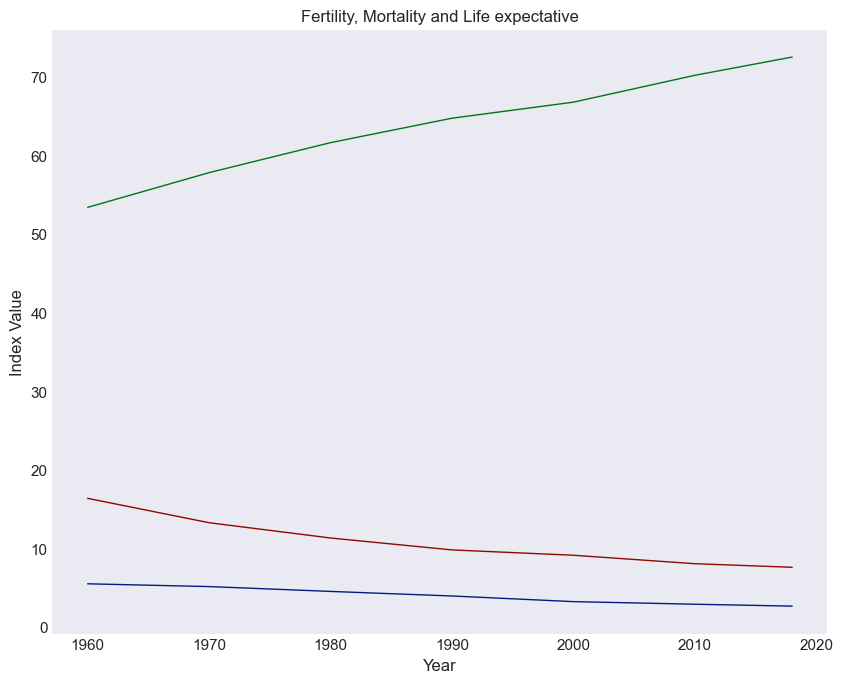

In [366]:
fig, ax = plt.subplots(figsize=(10,8),dpi=100)
plt.style.use('seaborn-dark-palette')
plt.plot(result, linewidth=1)
ax.set_xlabel('Year')
ax.set_ylabel('Index Value')
ax.set_title("Fertility, Mortality and Life expectative")

plt.show()